In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from scipy.stats import f_oneway, kruskal
from math import sqrt

import wrangle
import explore

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.options.mode.chained_assignment = None  # default='warn'

In [2]:
# import df
df, train_exp, X_train_scaled, y_train, X_test_scaled, y_test = wrangle.wrangle_data()
df.shape, train_exp.shape, X_train_scaled.shape, y_train.shape, X_test_scaled.shape, y_test.shape

Acquire: compiling raw data files...
Acquire: Completed!
Prepare: preparing data files...
Prepare: Completed!
(289, 40) (73, 40)


((362, 41), (289, 41), (289, 37), (289, 1), (73, 37), (73, 1))

In [3]:
train_exp.shape

(289, 41)

In [4]:
df.shape

(362, 41)

In [5]:
train_exp.head()

,tract,e_pov,ep_pov,spl_theme1,raw_svi,f_pov_soci,f_unemp_soci,f_pci_soci,f_nohsdp_soci,f_soci_total,...,delta,avg3yr,r_soci_rise,r_comp_rise,r_status_rise,r_trans_rise,r_soci_fall,r_comp_fall,r_status_fall,r_trans_fall
289,48029181821,328,8.8,1.3480,0.4879,0,0,0,0,0,...,0.2056,0.507933,1,1,0,0,0,0,0,0
200,48029171902,3712,25.5,2.9506,0.6394,0,0,0,0,0,...,0.1908,0.651467,0,0,0,0,0,1,0,0
69,48029130200,340,19.2,3.0120,0.6523,0,0,0,0,0,...,0.0648,0.780967,0,0,0,0,0,0,1,0
29,48029121120,143,2.7,0.8444,0.0872,0,0,0,0,0,...,0.0446,0.101767,0,0,1,0,1,0,0,0
12,48029120502,1766,31.8,3.4352,0.9531,0,0,0,0,0,...,0.1305,0.924967,1,0,1,1,0,0,0,0


<div class="alert alert-block alert-info"><b></b></div>

## Question One: Is there a correlation between the CDC's Range Category SVI Score and COVID-19 Infection Cases per 100k Individuals?

In [6]:
df, train_exp, X_train_scaled, y_train, X_test_scaled, y_test = wrangle.wrangle_data()

def sns_boxplot(train_exp):
    '''create boxplot for exploration'''
    #axes1.margins(x=0.05)
    plt.figure(figsize=(12,8))
    plt.rc('font', size=16)
    sns.boxplot(data=train_exp, x='bin_svi', y='tract_cases_per_100k')
    plt.title('December 8th COVID-19 Cases per 100K by SVI Range Category')
    plt.xlabel("CDC's SVI Range Category",labelpad=20)
    plt.ylabel("COVID-19 Cases per 100K",labelpad=20)
    plt.ylim([-100, 10000])
    plt.tight_layout()
    plt.show()

Acquire: compiling raw data files...
Acquire: Completed!
Prepare: preparing data files...
Prepare: Completed!
(289, 40) (73, 40)


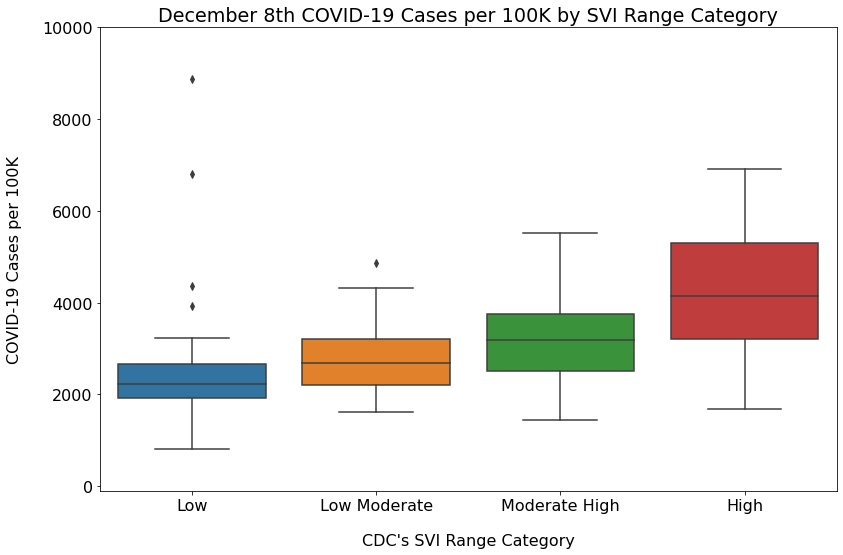

In [7]:
sns_boxplot(train_exp)

In [8]:
df, train_exp, X_train_scaled, y_train, X_test_scaled, y_test = wrangle.wrangle_dallas_data()

def sns_boxplot(train_exp):
    '''create boxplot for exploration'''
    #axes1.margins(x=0.05)
    plt.figure(figsize=(12,8))
    plt.rc('font', size=16)
    sns.boxplot(data=train_exp, x='bin_svi', y='tract_cases_per_100k')
    plt.title('December 8th COVID-19 Cases per 100K by SVI Range Category')
    plt.xlabel("CDC's SVI Range Category",labelpad=20)
    plt.ylabel("COVID-19 Cases per 100K",labelpad=20)
    plt.ylim([-100, 10000])
    plt.tight_layout()
    plt.show()

Acquire: compiling raw data files...
Acquire: Completed!
Prepare: preparing data files...
Prepare: Completed!
(246, 40) (62, 40)


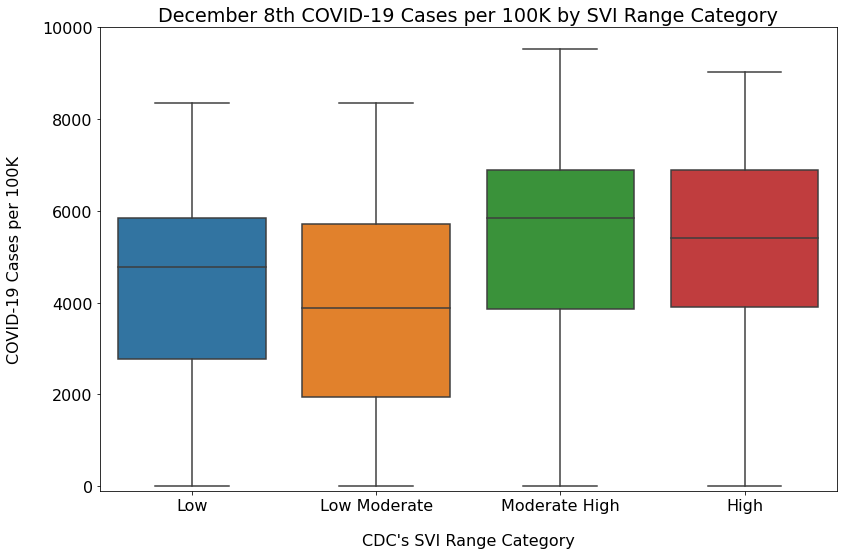

In [9]:
sns_boxplot(train_exp)

### Takeaway:
`There appears to be a correlation between COVID-19 Count and SVI Category. Next step is Hypothesis testing between categories to validate statistical significance`

In [10]:
# Mean COVID-19 Count By CDC's SVI Category
All = round(train_exp.tract_cases_per_100k.mean(),5)
low = round((train_exp[train_exp.bin_svi == 'low']).tract_cases_per_100k.mean(),5)
low_mod = round((train_exp[train_exp.bin_svi == 'low_mod']).tract_cases_per_100k.mean(),6)
mod_high = round((train_exp[train_exp.bin_svi == 'mod_high']).tract_cases_per_100k.mean(),6)
high = round((train_exp[train_exp.bin_svi== 'high']).tract_cases_per_100k.mean(),6)

print(f'The average number of cases per 100k for all CDC SVI Range Categories is {All}') 
print(f'The average number of cases per 100k for CDC SVI Range Category (low) is {low}')
print(f'The average number of cases per 100k for CDC SVI Range Category (low_mod) is {low_mod}')
print(f'The average number of cases per 100k for CDC SVI Range Category (mod_high) is {mod_high}')
print(f'The average number of cases per 100k for CDC SVI Range Category (high) is {high}')

The average number of cases per 100k for all CDC SVI Range Categories is 4849.86647
The average number of cases per 100k for CDC SVI Range Category (low) is nan
The average number of cases per 100k for CDC SVI Range Category (low_mod) is nan
The average number of cases per 100k for CDC SVI Range Category (mod_high) is nan
The average number of cases per 100k for CDC SVI Range Category (high) is nan



**Is This Difference Statistically Significant? (ANOVA/Kruskal)**

*Question - Is there a significant difference in average number of COVID-19 cases per 100k when examined by CDC SVI Range Category ?*

null = Average number of COVID-19 cases per 100k is the same across all CDC SVI Range Categories   


alternate = Average number of COVID-19 cases per 100k is significantly different counties across all CDC SVI Range Categories   


alpha = 0.01 (Let's be 99% certain the result we see aren't due to chance/randomness)   


In [11]:
# f_oneway is our ANOVA test
# See https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html for more info

low = (train_exp[train_exp.bin_svi == 'low']).tract_cases_per_100k
low_mod = (train_exp[train_exp.bin_svi == 'low_mod']).tract_cases_per_100k
mod_high = (train_exp[train_exp.bin_svi == 'mod_high']).tract_cases_per_100k
high = (train_exp[train_exp.bin_svi== 'high']).tract_cases_per_100k

#### Variance Test

In [12]:
stats.levene(low, low_mod, mod_high, high)

/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


LeveneResult(statistic=nan, pvalue=nan)

#### p-value < 0.05, Non Parametric Version of ANOVA (Kruskal)

In [13]:
alpha = 0.01
null = "Average number of COVID-19 cases per 100k is the same across all CDC SVI Range Categories "
alternate = "Average number of COVID-19 cases per 100k is significantly different counties across all CDC SVI Range Categories "

f, p = kruskal(low, low_mod, mod_high, high)
print('f=', f)
print('p=', p)
print('\n')
if p < alpha:
    print("We reject the null that: \n", null)
    print('\n')
    print("We move forward with the alternative hypothesis that: \n", alternate)
else:
    print("We fail to reject the null")
    print("Evidence does not support the claim that smoking status and time of day are dependent/related")

f= nan
p= nan


We fail to reject the null
Evidence does not support the claim that smoking status and time of day are dependent/related


**Takeaway**

`We can state with 99% certainty that there is a statistically significant difference between all of the CDC SVI Range Categories`

<div class="alert alert-block alert-info"><b></b></div>

## Question Two: Is there a correlation between raw_svi and cases per 100k?

#### Pearsons R

In [14]:
# isolate variables to test
raw_svi = train_exp.raw_svi
cases_per_100k = train_exp.tract_cases_per_100k
null = "There is no statistically significant difference betweeen raw_svi and cases per 100K "
alternate = "There is a statistically significant difference betweeen raw_svi and cases per 100K"

In [15]:
def pearson(continuous_var1, continuous_var2, null, alternate):
    '''
    runs pearson r test on 2 continuous variables
    '''
    alpha = .01
    r, p = stats.pearsonr(continuous_var1, continuous_var2)
    print('r=', r)
    print('p=', p)
    print('\n')
    if p < alpha:
        print("We reject the null that: \n", null)
        print('\n')
        print("We move forward with the alternative hypothesis that: \n", alternate)
    else:
        print("We fail to reject the null")
        print("Evidence does not support the claim that smoking status and time of day are dependent/related")


In [16]:
pearson(raw_svi,cases_per_100k, null, alternate)

r= 0.19395225483933634
p= 0.0022461351772073666


We reject the null that: 
 There is no statistically significant difference betweeen raw_svi and cases per 100K 


We move forward with the alternative hypothesis that: 
 There is a statistically significant difference betweeen raw_svi and cases per 100K


## explore.py Function

In [17]:
def sns_boxplot(train_exp):
    '''create boxplot for hypothesis test exploration
    '''
    #axes1.margins(x=0.05)
    plt.figure(figsize=(12,8))
    plt.rc('font', size=16)
    sns.boxplot(data=train_exp, x='bin_svi', y='tract_cases_per_100k')
    plt.title('December 8th COVID-19 Cases per 100K by SVI Range Category')
    plt.xlabel("CDC's SVI Range Category",labelpad=20)
    plt.ylabel("COVID-19 Cases per 100K",labelpad=20)
    plt.tight_layout()
    plt.show()
    
def kruskal_test(avg_var1, avg_var2, avg_var3, avg_var4, null, alternate, alpha):
    '''
    Runs non parametric ANOVA when p-value from levene test(variance) is < 0.05
    '''
    alpha = alpha
    f, p = kruskal(avg_var1,avg_var2,avg_var3,avg_var4)
    print('f=', f)
    print('p=', p)
    print('\n')
    if p < alpha:
        print("We reject the null that: \n", null)
        print('\n')
        print("We move forward with the alternative hypothesis that: \n", alternate)
    else:
        print("We fail to reject the null")
        print("Evidence does not support the claim that smoking status and time of day are dependent/related")
    
def pearson(continuous_var1, continuous_var2, null, alternate, alpha):
    '''
    runs pearson r test on 2 continuous variables
    '''
    alpha = alpha
    r, p = stats.pearsonr(continuous_var1, continuous_var2)
    print('r=', r)
    print('p=', p)
    print('\n')
    if p < alpha:
        print("We reject the null that: \n", null)
        print('\n')
        print("We move forward with the alternative hypothesis that: \n", alternate)
    else:
        print("We fail to reject the null")
        print("Evidence does not support the claim that smoking status and time of day are dependent/related")

#### Function Test

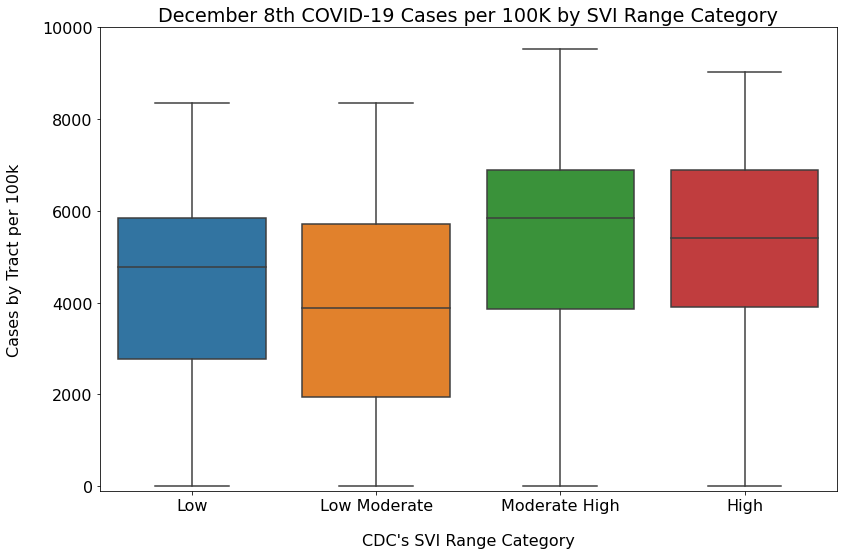

In [18]:
explore.sns_boxplot(train_exp)

In [19]:
low = (train_exp[train_exp.bin_svi == 'low']).tract_cases_per_100k
low_mod = (train_exp[train_exp.bin_svi == 'low_mod']).tract_cases_per_100k
mod_high = (train_exp[train_exp.bin_svi == 'mod_high']).tract_cases_per_100k
high = (train_exp[train_exp.bin_svi== 'high']).tract_cases_per_100k
alpha = 0.01
null = "Average number of COVID-19 cases per 100k is the same across all CDC SVI Range Categories "
alternate = "Average number of COVID-19 cases per 100k is significantly different across all CDC SVI Range Categories "
explore.kruskal_test(low, low_mod, mod_high, high, null, alternate, alpha)

f= nan
p= nan


We fail to reject the null
Evidence does not support the claim that smoking status and time of day are dependent/related


In [20]:
raw_svi = train_exp.raw_svi
cases_per_100k = train_exp.tract_cases_per_100k
alpha = 0.01
null = "There is no statistically significant difference betweeen raw_svi and cases per 100K "
alternate = "There is a statistically significant difference betweeen raw_svi and cases per 100K"
explore.pearson(raw_svi, cases_per_100k, null, alternate, alpha)

r= 0.19395225483933634
p= 0.0022461351772073666


We reject the null that: 
 There is no statistically significant difference betweeen raw_svi and cases per 100K 


We move forward with the alternative hypothesis that: 
 There is a statistically significant difference betweeen raw_svi and cases per 100K


#### Explore Graphing Functions:

In [21]:
def joint_plot_index(x,y,df,hue):
    """
    Function that produces a joint plot and examines data by categorical variable
    """
    ax = sns.jointplot(x = x, 
                       y = y, 
                       data = df, 
                       hue = hue, 
                       height = 10,
                       space = 0)
    ax.ax_joint.set_xlabel("SVI Index Value", fontweight='bold', fontsize = 14, labelpad=20)
    ax.ax_joint.set_ylabel('Cases by Tract per 100k', fontweight='bold', fontsize = 14, labelpad=20)
    ax.fig.suptitle("Distribution of Cases and SVI Score", fontweight='bold', fontsize = 20) 
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    ax.fig.tight_layout()
    plt.show()

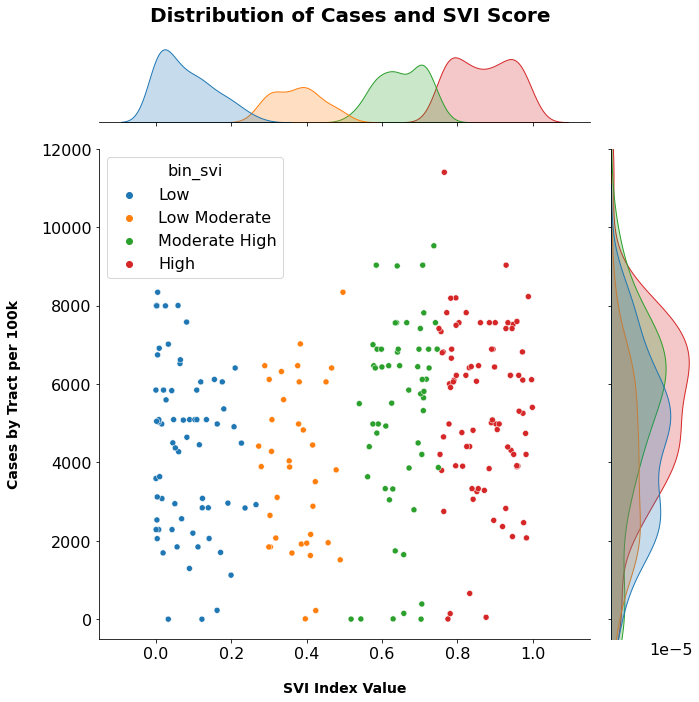

In [22]:
explore.joint_plot_index('raw_svi','tract_cases_per_100k', train_exp, 'bin_svi')

In [23]:
def joint_plot_flag(x,y,df,hue):
    ax2 = sns.jointplot(x = x, 
                        y = y, 
                        data = df, 
                        hue = hue, 
                        height = 10,
                        space = 0,
                        xlim =(-1,10),)
    ax2.ax_joint.set_xlabel('Total Number of Flags', fontweight='bold', fontsize = 14,labelpad=20)
    ax2.ax_joint.set_ylabel('Cases by Tract per 100k', fontweight='bold', fontsize = 14,labelpad=20)
    ax2.fig.suptitle("Distribution of Cases and SVI Flags", fontweight='bold', fontsize = 20)
    ax2.fig.tight_layout()
    plt.show()


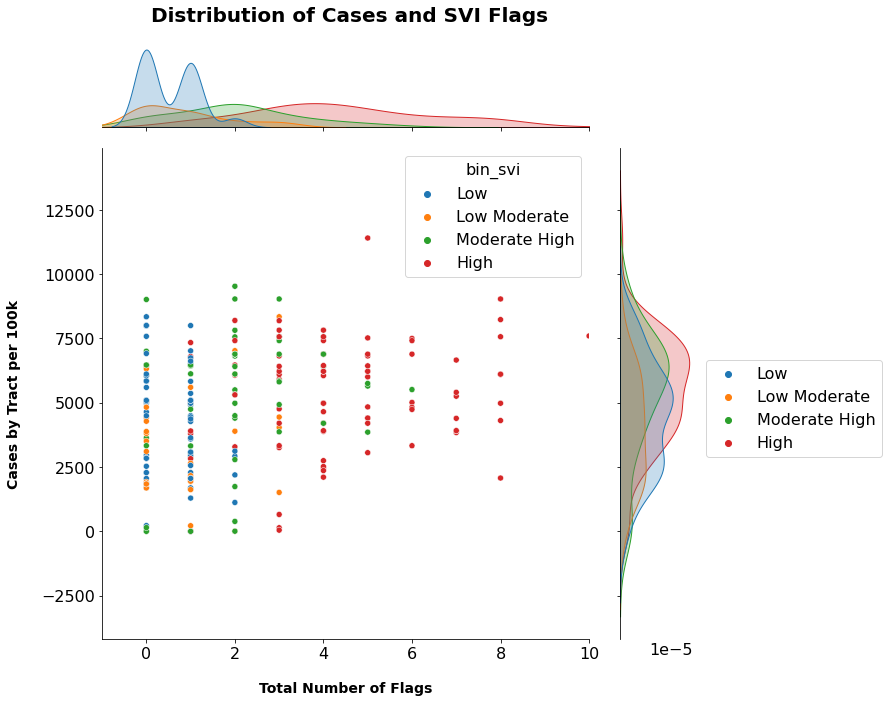

In [24]:
ax2 = sns.jointplot(x = "all_flags_total", 
                    y = "tract_cases_per_100k", 
                    data = train_exp, 
                    hue = 'bin_svi', 
                    height = 10,
                    space = 0,
                    xlim =(-1,10),
                    legend = True)
#ax2.fig.legend(loc='center right', bbox_to_anchor=(1.25, 0.5), ncol=1)
#ax2.legend_.remove()
ax2.fig.legend(bbox_to_anchor=(1.25, 0.5), ncol=1)
ax2.ax_joint.set_xlabel('Total Number of Flags', fontweight='bold', fontsize = 14,labelpad=20)
ax2.ax_joint.set_ylabel('Cases by Tract per 100k', fontweight='bold', fontsize = 14,labelpad=20)
ax2.fig.suptitle("Distribution of Cases and SVI Flags", fontweight='bold', fontsize = 20)
ax2.fig.tight_layout()
plt.show()

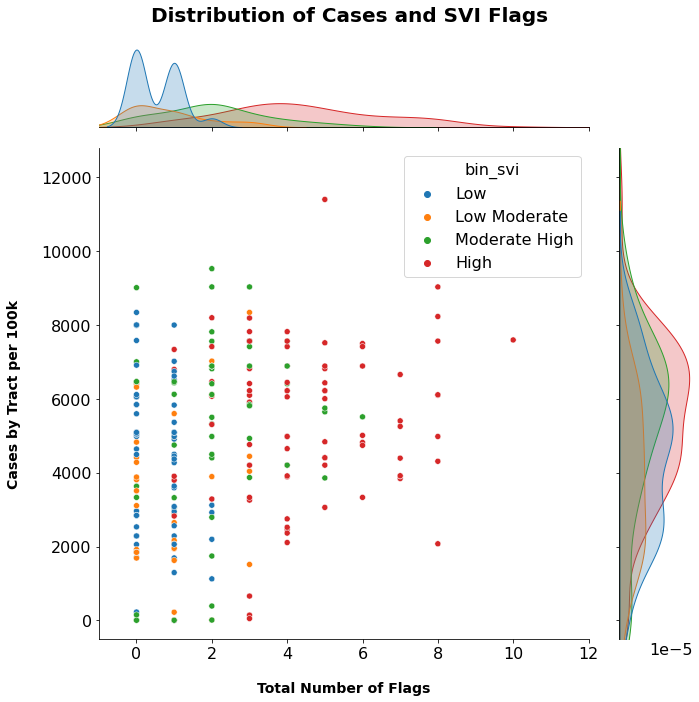

In [25]:

explore.joint_plot_flag("all_flags_total","tract_cases_per_100k",train_exp,'bin_svi')

In [26]:
# Creating the histograms
def hist_case(series):
    plt.figure(figsize=(12,8))
    plt.rc('font', size=16)
    plt.hist(x = series, bins = 10, color = 'gray', edgecolor='k', alpha=0.45)
    plt.title('Distribution of Cases in San Antonio, TX: December 8th 2020', y=1.02)
    plt.xlabel('Number of Cases per 100,000',labelpad=20)
    plt.ylabel('Case Count',labelpad=20)
    plt.axvline(series.mean(), color = 'tab:orange', linestyle='dashed', linewidth=5)
    min_ylim_v, max_ylim_v = plt.ylim()
    plt.text(series.mean()*1.05, max_ylim_v*0.9, 'Mean: {:.2f}'.format(series.mean()))
    plt.axvline(train_exp.tract_cases_per_100k.median(), color = 'darkgreen', linestyle='dashed', linewidth=5)
    plt.text(series.median()*.25, max_ylim_v*0.9, 'Median: {:.2f}'.format(series.median()))
    plt.grid(b = True, alpha = .45)
    # plt.figure(figsize = (16, 9))
    plt.tight_layout()
    plt.show()


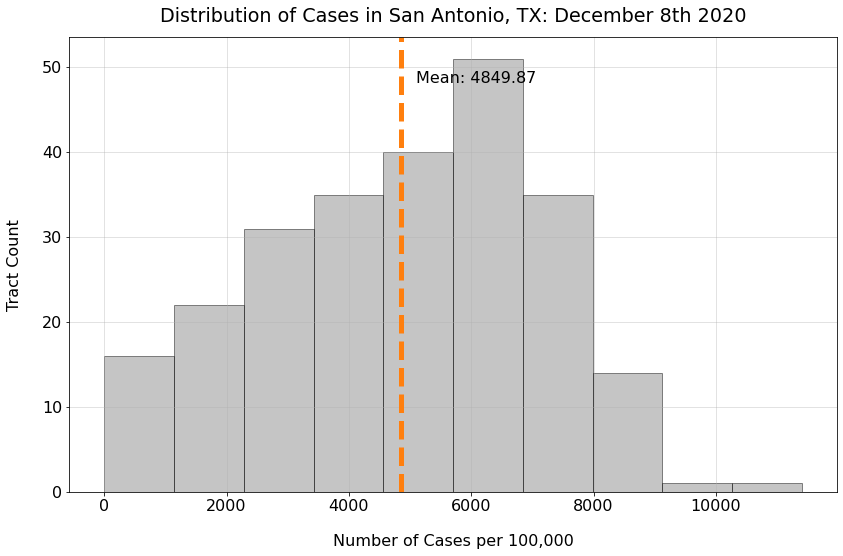

In [27]:
explore.hist_case(train_exp.tract_cases_per_100k)

## Cluster Dallas Data

In [28]:
df, train_exp, X_train_scaled, y_train, X_test_scaled, y_test = wrangle.wrangle_dallas_data()

Acquire: compiling raw data files...
Acquire: Completed!
Prepare: preparing data files...
Prepare: Completed!
(246, 40) (62, 40)


In [29]:
df.head(1)

,tract,e_pov,ep_pov,spl_theme1,raw_svi,f_pov_soci,f_unemp_soci,f_pci_soci,f_nohsdp_soci,f_soci_total,...,delta,avg3yr,r_soci_rise,r_comp_rise,r_status_rise,r_trans_rise,r_soci_fall,r_comp_fall,r_status_fall,r_trans_fall
0,48113000100,222,5.6,0.4947,0.0271,0,0,0,0,0,...,-0.0138,0.054,0,0,0,0,0,0,0,0


In [30]:
train_exp['zip'] = train_exp['zip'].astype('category')
#train_exp
#df['col2'] = df['col2'].astype('category')

In [31]:
train_exp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 246 entries, 233 to 304
Data columns (total 41 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   tract                 246 non-null    int64   
 1   e_pov                 246 non-null    int64   
 2   ep_pov                246 non-null    float64 
 3   spl_theme1            246 non-null    float64 
 4   raw_svi               246 non-null    float64 
 5   f_pov_soci            246 non-null    int64   
 6   f_unemp_soci          246 non-null    int64   
 7   f_pci_soci            246 non-null    int64   
 8   f_nohsdp_soci         246 non-null    int64   
 9   f_soci_total          246 non-null    int64   
 10  f_age65_comp          246 non-null    int64   
 11  f_age17_comp          246 non-null    int64   
 12  f_disabl_comp         246 non-null    int64   
 13  f_sngpnt_comp         246 non-null    int64   
 14  f_comp_total          246 non-null    int64   
 15  f_mi

In [32]:
train_exp.head(1)

,tract,e_pov,ep_pov,spl_theme1,raw_svi,f_pov_soci,f_unemp_soci,f_pci_soci,f_nohsdp_soci,f_soci_total,...,delta,avg3yr,r_soci_rise,r_comp_rise,r_status_rise,r_trans_rise,r_soci_fall,r_comp_fall,r_status_fall,r_trans_fall
233,48113013616,528,7.3,0.7117,0.0891,0,0,0,0,0,...,0.0086,0.1063,0,0,1,0,0,0,0,0


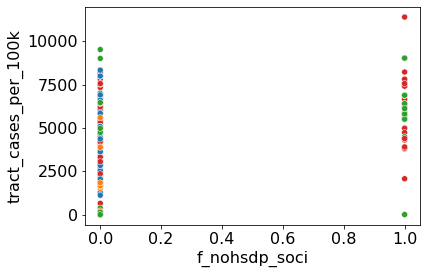

In [33]:
sns.scatterplot(x='f_nohsdp_soci', y='tract_cases_per_100k',
               data=train_exp, hue='bin_svi',legend = False)
plt.title("")
plt.show()

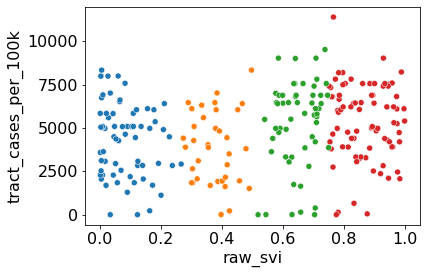

In [34]:
sns.scatterplot(x='raw_svi', y='tract_cases_per_100k',
               data=train_exp, hue='bin_svi',legend = False)
plt.title("")
plt.show()

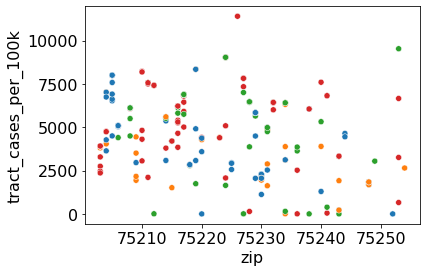

In [35]:
sns.scatterplot(x='zip', y='tract_cases_per_100k',
               data=train_exp, hue='bin_svi',legend = False)
plt.title("")
plt.show()

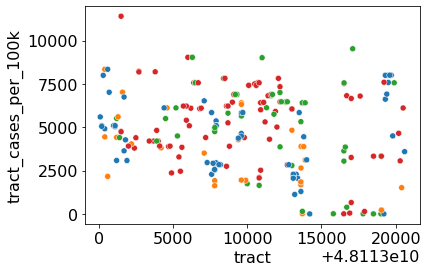

In [36]:
sns.scatterplot(x='tract', y='tract_cases_per_100k',
               data=train_exp, hue='bin_svi',legend = False)
plt.title("")
plt.show()

#### Need more ganularity in Dallas data, going back to origional df for raw flag scores to look for correlations

In [37]:
df = pd.read_csv('dallas_2018_tract.csv')
df.head(1)

,ST,STATE,ST_ABBR,STCNTY,COUNTY,FIPS,LOCATION,AREA_SQMI,E_TOTPOP,M_TOTPOP,...,F_CROWD,F_NOVEH,F_GROUPQ,F_THEME4,F_TOTAL,E_UNINSUR,M_UNINSUR,EP_UNINSUR,MP_UNINSUR,E_DAYPOP
0,48,TEXAS,TX,48113,Dallas,48113000100,"Census Tract 1, Dallas County, Texas",1.183369,3937,487,...,0,0,0,0,0,96,73,2.4,1.9,2484


In [38]:
df.columns

Index(['ST', 'STATE', 'ST_ABBR', 'STCNTY', 'COUNTY', 'FIPS', 'LOCATION',
       'AREA_SQMI', 'E_TOTPOP', 'M_TOTPOP',
       ...
       'F_CROWD', 'F_NOVEH', 'F_GROUPQ', 'F_THEME4', 'F_TOTAL', 'E_UNINSUR',
       'M_UNINSUR', 'EP_UNINSUR', 'MP_UNINSUR', 'E_DAYPOP'],
      dtype='object', length=124)

***
**Takeaway**: 
`Features that demonstrate potential for Clustering`

1. E_POV (Persons below poverty estimate)
2. E_PCI (Per capita income estimate)
3. EP_POV (Percentage of persons below poverty estimate)
4. EP_PCI (Percentage of persons Per capita income estimate)
5. SPL_THEME1 (Sum of series for Socioeconomic theme)
6. SPL_THEMES (Sum of series themes)


*Very few features are affective in classifying SVI groups.  Suggests COVID affects all groups equally in Dallas*
***

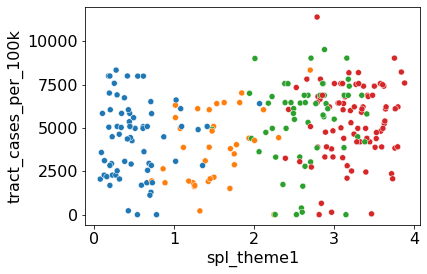

In [39]:
sns.scatterplot(x='spl_theme1', y= 'tract_cases_per_100k',
               data = train_exp, hue='bin_svi',legend = False)
plt.title("")
plt.show()

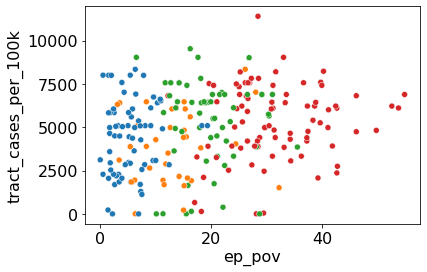

In [40]:
sns.scatterplot(x='ep_pov', y= 'tract_cases_per_100k',
               data = train_exp, hue='bin_svi',legend = False)
plt.title("")
plt.show()

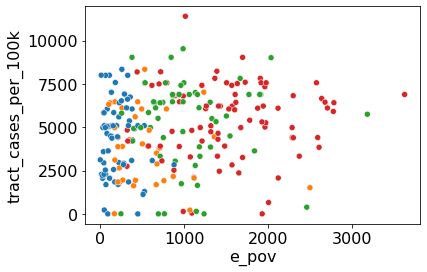

In [41]:
sns.scatterplot(x='e_pov', y= 'tract_cases_per_100k',
               data = train_exp, hue='bin_svi',legend = False)
plt.title("")
plt.show()

In [42]:


import wrangle
import explore
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.options.display.float_format = '{:20,.2f}'.format

from math import sqrt
from scipy import stats
from scipy.stats import f_oneway, kruskal

import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler, QuantileTransformer, PowerTransformer, RobustScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from statsmodels.formula.api import ols
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
from sklearn.feature_selection import f_regression, SelectKBest, RFE 
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.cluster import KMeans



## Clustering Features

**Takeaway**: 
`Features that demonstrate potential for Clustering`

1. E_POV (Persons below poverty estimate)
2. E_PCI (Per capita income estimate)
3. EP_POV (Percentage of persons below poverty estimate)
4. EP_PCI (Percentage of persons Per capita income estimate)
5. SPL_THEME1 (Sum of series for Socioeconomic theme)
6. SPL_THEMES (Sum of series themes)


*Very few features are affective in classifying SVI groups.  Suggests COVID affects all groups equally in Dallas*

In [43]:
df, train_exp, X_train_scaled, y_train, X_test_scaled, y_test = wrangle.wrangle_data()
df.shape, train_exp.shape, X_train_scaled.shape, y_train.shape, X_test_scaled.shape, y_test.shape

Acquire: compiling raw data files...
Acquire: Completed!
Prepare: preparing data files...
Prepare: Completed!
(289, 40) (73, 40)


((362, 41), (289, 41), (289, 37), (289, 1), (73, 37), (73, 1))

In [44]:
df.head(1)

,tract,e_pov,ep_pov,spl_theme1,raw_svi,f_pov_soci,f_unemp_soci,f_pci_soci,f_nohsdp_soci,f_soci_total,...,delta,avg3yr,r_soci_rise,r_comp_rise,r_status_rise,r_trans_rise,r_soci_fall,r_comp_fall,r_status_fall,r_trans_fall
0,48029110100,513,20.80,1.90,0.65,0,0,0,0,0,...,0.08,0.71,1,0,1,0,0,1,0,0


In [45]:
# Linear Correlations (e_pov)? 
def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2

x = train_exp.e_pov
y = train_exp.tract_cases_per_100k
stat_func = r2(x,y)
stat_func

0.13144180316156412

In [46]:
# Linear Correlations (ep_pov)? 
def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2

x = train_exp.ep_pov
y = train_exp.tract_cases_per_100k
stat_func = r2(x,y)
stat_func

0.21687699990784182

In [47]:
# Linear Correlations (spl_theme1)? 
def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2

x = train_exp.spl_theme1
y = train_exp.tract_cases_per_100k
stat_func = r2(x,y)
stat_func

0.3698703237202522

In [48]:


def elbow_plot(X_train_scaled, cluster_vars):
    '''
    Given X_train and cluster variables plots an elbow_plot
    '''
    # elbow method to identify good k for us
    ks = range(1,10)
    
    # empty list to hold inertia (sum of squares)
    sse = []

    # loop through each k, fit kmeans, get inertia
    for k in ks:
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(X_train_scaled[cluster_vars])
        # inertia
        sse.append(kmeans.inertia_)

    print(pd.DataFrame(dict(k=ks, sse=sse)))

    # plot k with inertia
    plt.plot(ks, sse, 'bx-')
    plt.xlabel('k')
    plt.ylabel('SSE')
    plt.title('Elbow method to find optimal k')
    plt.show()
    
##################################################################################################################

def run_kmeans(X_train_scaled, k, cluster_vars, cluster_col_name):
    '''
    Creates a kemeans object and creates a dataframe with cluster information
    '''
    # create kmeans object
    kmeans = KMeans(n_clusters = k, random_state = 13)
    kmeans.fit(X_train_scaled[cluster_vars])
    # predict and create a dataframe with cluster per observation
    train_clusters = \
        pd.DataFrame(kmeans.predict(X_train_scaled[cluster_vars]),
                              columns=[cluster_col_name],
                              index=X_train_scaled.index)
    
    return train_clusters, kmeans

##################################################################################################################

def kmeans_transform(X_scaled, kmeans, cluster_vars, cluster_col_name):
    '''
    Takes in a dataframe and returns custers that have been predicted on that dataframe
    '''
    kmeans.transform(X_scaled[cluster_vars])
    trans_clusters = \
        pd.DataFrame(kmeans.predict(X_scaled[cluster_vars]),
                              columns=[cluster_col_name],
                              index=X_scaled.index)
    
    return trans_clusters

##################################################################################################################

def get_centroids(cluster_vars, cluster_col_name, kmeans):
    '''
    Takes in kmeans and cluster variables to produce centroids
    '''
    centroid_col_names = ['centroid_' + i for i in cluster_vars]

    centroids = pd.DataFrame(kmeans.cluster_centers_, 
             columns=centroid_col_names).reset_index().rename(columns={'index': cluster_col_name})
    
    return centroids

##################################################################################################################

def add_to_train(train_clusters, centroids, X_train, X_train_scaled, cluster_col_name):
    '''
    Takes in a datafrme, clusters, centroids and returns a new dataframe with all information concated together
    '''
    # concatenate cluster id
    X_train2 = pd.concat([X_train, train_clusters], axis=1)

    # join on clusterid to get centroids
    X_train2 = X_train2.merge(centroids, how='left', 
                            on=cluster_col_name).\
                        set_index(X_train.index)
    
    # concatenate cluster id
    X_train_scaled2 = pd.concat([X_train_scaled, train_clusters], 
                               axis=1)

    # join on clusterid to get centroids
    X_train_scaled2 = X_train_scaled2.merge(centroids, how='left', 
                                          on=cluster_col_name).\
                            set_index(X_train.index)
    
    return X_train2, X_train_scaled2

##################################################################################################################


In [49]:
# Elbow Plot for Socio Economic Cluster

# cluster_vars = ['spl_theme1', 'ep_pov', 'e_pov']
# elbow_plot(X_train_scaled, cluster_vars)

In [50]:
# Create Clusters
cluster_vars = ['spl_theme1', 'ep_pov', 'e_pov']
kmeans = KMeans(n_clusters = 4, random_state = 13)
kmeans.fit(train_exp[cluster_vars])
    # predict and create a dataframe with cluster per observation
train_clusters = \
        pd.DataFrame(kmeans.predict(train_exp[cluster_vars]),
                              columns=['poverty_cluster'],
                              index=train_exp.index)


In [51]:
# Create Centroids
centroids = get_centroids(cluster_vars, cluster_col_name='poverty_cluster', kmeans= kmeans)

In [52]:
X_train_scaled.shape, X_test_scaled.shape, train_exp.shape

((289, 37), (73, 37), (289, 41))

In [53]:
train_exp.head()

,tract,e_pov,ep_pov,spl_theme1,raw_svi,f_pov_soci,f_unemp_soci,f_pci_soci,f_nohsdp_soci,f_soci_total,...,delta,avg3yr,r_soci_rise,r_comp_rise,r_status_rise,r_trans_rise,r_soci_fall,r_comp_fall,r_status_fall,r_trans_fall
289,48029181821,328,8.80,1.35,0.49,0,0,0,0,0,...,0.21,0.51,1,1,0,0,0,0,0,0
200,48029171902,3712,25.50,2.95,0.64,0,0,0,0,0,...,0.19,0.65,0,0,0,0,0,1,0,0
69,48029130200,340,19.20,3.01,0.65,0,0,0,0,0,...,0.06,0.78,0,0,0,0,0,0,1,0
29,48029121120,143,2.70,0.84,0.09,0,0,0,0,0,...,0.04,0.10,0,0,1,0,1,0,0,0
12,48029120502,1766,31.80,3.44,0.95,0,0,0,0,0,...,0.13,0.92,1,0,1,1,0,0,0,0


In [54]:

train_exp = pd.concat([train_exp, train_clusters], axis=1)
train_exp = train_exp.merge(centroids, how='left',on='poverty_cluster').set_index(train_exp.index)

In [55]:
train_exp.shape

(289, 45)

## Are clusters Significant?

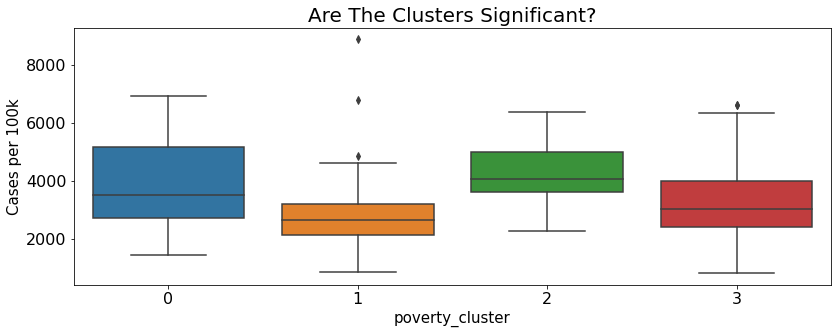

In [56]:
plt.rcParams['figure.figsize'] = (15.0, 8.0)
sns.boxplot(train_exp.poverty_cluster, train_exp.tract_cases_per_100k)
plt.xlabel("poverty_cluster", fontsize=15 )
plt.ylabel("Cases per 100k", fontsize=15)
plt.title("Are The Clusters Significant?",fontsize=20)
plt.tight_layout(pad =8)
#plt.ylim(.55,.61)
plt.show()


Hypothesis Testing: (ANOVA/Kruskal)

Is there a statistically signfinicant difference between poverty_clusters and cases per 100k?

Null Hypothesis: Mean # of cases is the same across all clusters

Alternative Hypothesis: Mean # of cases is different across clusters

alpha=0.01


In [57]:
cluster_0 = train_exp[train_exp.poverty_cluster == 0].tract_cases_per_100k
cluster_1 = train_exp[train_exp.poverty_cluster == 1].tract_cases_per_100k
cluster_2 = train_exp[train_exp.poverty_cluster == 2].tract_cases_per_100k
cluster_3 = train_exp[train_exp.poverty_cluster == 3].tract_cases_per_100k

In [58]:
# Variance Test
stats.levene(cluster_0, cluster_1, cluster_2, cluster_3)

LeveneResult(statistic=4.429282707378131, pvalue=0.004614920974194838)

In [59]:
# Hypothesis Test

alpha = 0.01
null = "Mean logerror is the same across all clusters"
alternate = "Average logerror is significantly different between clusters"

f, p = kruskal(cluster_0, cluster_1, cluster_2, cluster_3)
if p < alpha:
    print("We reject the null that:", null)
    print("We move forward with the alternative hypothesis that:", alternate)
else:
    print("We fail to reject the null")
    print("Evidence does not support the claim that there is a staistically signfinicant difference between poverty_clusters and cases per 100k")

We reject the null that: Mean logerror is the same across all clusters
We move forward with the alternative hypothesis that: Average logerror is significantly different between clusters


In [60]:
train_exp.head()

,tract,e_pov,ep_pov,spl_theme1,raw_svi,f_pov_soci,f_unemp_soci,f_pci_soci,f_nohsdp_soci,f_soci_total,...,r_status_rise,r_trans_rise,r_soci_fall,r_comp_fall,r_status_fall,r_trans_fall,poverty_cluster,centroid_spl_theme1,centroid_ep_pov,centroid_e_pov
289,48029181821,328,8.80,1.35,0.49,0,0,0,0,0,...,0,0,0,0,0,0,1,1.39,8.98,322.02
200,48029171902,3712,25.50,2.95,0.64,0,0,0,0,0,...,0,0,0,1,0,0,2,3.27,35.40,"2,459.50"
69,48029130200,340,19.20,3.01,0.65,0,0,0,0,0,...,0,0,0,0,1,0,1,1.39,8.98,322.02
29,48029121120,143,2.70,0.84,0.09,0,0,0,0,0,...,1,0,1,0,0,0,1,1.39,8.98,322.02
12,48029120502,1766,31.80,3.44,0.95,0,0,0,0,0,...,1,1,0,0,0,0,0,2.99,30.56,"1,554.61"


In [61]:
def anova_test(avg_var1, avg_var2, avg_var3, avg_var4, null, alternate, alpha):
    '''
    Runs non parametric ANOVA when p-value from levene test(variance) is < 0.05
    '''
    alpha = alpha
    f, p = stats.f_oneway(avg_var1,avg_var2,avg_var3,avg_var4)
    print('f=', f)
    print('p=', p)
    print('\n')
    if p < alpha:
        print("We reject the null that: \n", null)
        print('\n')
        print("We move forward with the alternative hypothesis that: \n", alternate)
    else:
        print("We fail to reject the null")
        print("Evidence does not support the claim that smoking status and time of day are dependent/related")

In [62]:
# alpha = 0.01
# null = "Mean logerror is the same across all clusters"
# alternate = "Average logerror is significantly different between clusters"
# anova_test(cluster_0, cluster_1, cluster_2, cluster_3, alpha, null, alternate)

In [63]:
df, train_exp, X_train_scaled, y_train, X_test_scaled, y_test = wrangle.wrangle_data()

def joint_plot_index(x,y,df,hue):
    """
    Function that produces a joint plot and examines data by categorical variable
    """
    ax = sns.jointplot(x = x, 
                       y = y, 
                       data = df, 
                       hue = hue, 
                       height = 10,
                       space = 0)
    ax.ax_joint.set_xlabel("SVI Index Value", fontweight='bold', fontsize = 14, labelpad=20)
    ax.ax_joint.set_ylabel('Cases by Tract per 100k', fontweight='bold', fontsize = 14, labelpad=20)
    ax.fig.suptitle("Distribution of Cases and SVI Score", fontweight='bold', fontsize = 20) 
    #plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    ax.ax_joint.set_ylim(-500,12000)
    ax.fig.tight_layout()
    plt.show()

Acquire: compiling raw data files...
Acquire: Completed!
Prepare: preparing data files...
Prepare: Completed!
(289, 40) (73, 40)


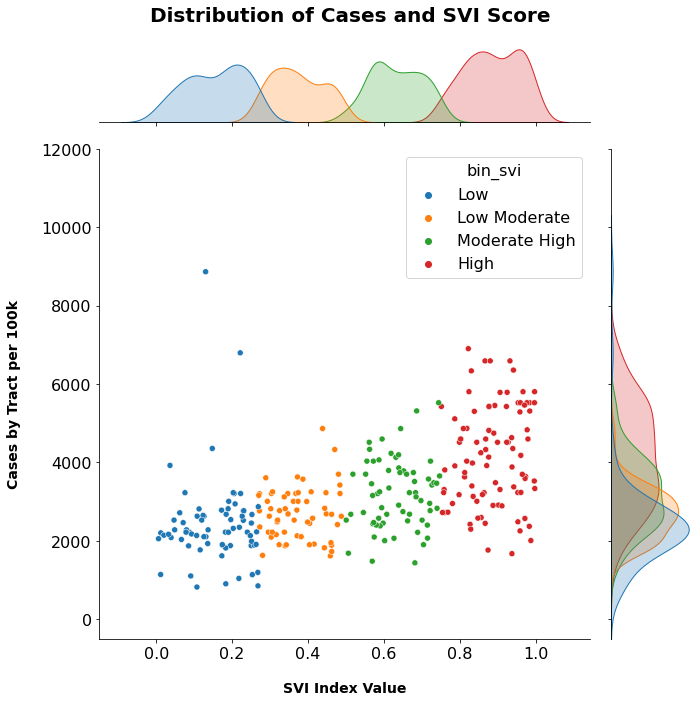

In [64]:
joint_plot_index('raw_svi','tract_cases_per_100k', train_exp, 'bin_svi')

In [65]:
df, train_exp, X_train_scaled, y_train, X_test_scaled, y_test = wrangle.wrangle_dallas_data()

def joint_plot_index(x,y,df,hue):
    """
    Function that produces a joint plot and examines data by categorical variable
    """
    ax = sns.jointplot(x = x, 
                       y = y, 
                       data = df, 
                       hue = hue, 
                       height = 10,
                       space = 0)
    ax.ax_joint.set_xlabel("SVI Index Value", fontweight='bold', fontsize = 14, labelpad=20)
    ax.ax_joint.set_ylabel('Cases by Tract per 100k', fontweight='bold', fontsize = 14, labelpad=20)
    ax.fig.suptitle("Distribution of Cases and SVI Score", fontweight='bold', fontsize = 20) 
    #plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    #ax.ax_joint.set_ylim(-500,12000)
    ax.fig.tight_layout()
    plt.show()

Acquire: compiling raw data files...
Acquire: Completed!
Prepare: preparing data files...
Prepare: Completed!
(246, 40) (62, 40)


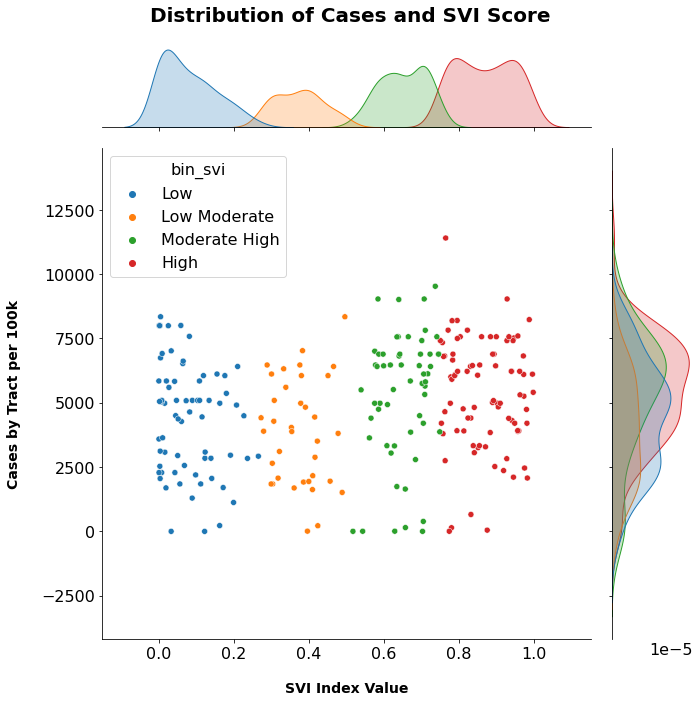

In [66]:
joint_plot_index('raw_svi','tract_cases_per_100k', train_exp, 'bin_svi')

In [67]:
df, train_exp, X_train_scaled, y_train, X_test_scaled, y_test = wrangle.wrangle_data()

def joint_plot_flag(x,y,df,hue):
    ax2 = sns.jointplot(x = x, 
                        y = y, 
                        data = df, 
                        hue = hue, 
                        height = 10,
                        space = 0,
                        xlim = (-1,12),
                        ylim = (-500,12800))
    ax2.ax_joint.set_xlabel('Total Number of Flags', fontweight='bold', fontsize = 14,labelpad=20)
    ax2.ax_joint.set_ylabel('Cases by Tract per 100k', fontweight='bold', fontsize = 14,labelpad=20)
    ax2.fig.suptitle("Distribution of Cases and SVI Flags", fontweight='bold', fontsize = 20)
    ax2.fig.tight_layout()
    plt.show()

Acquire: compiling raw data files...
Acquire: Completed!
Prepare: preparing data files...
Prepare: Completed!
(289, 40) (73, 40)


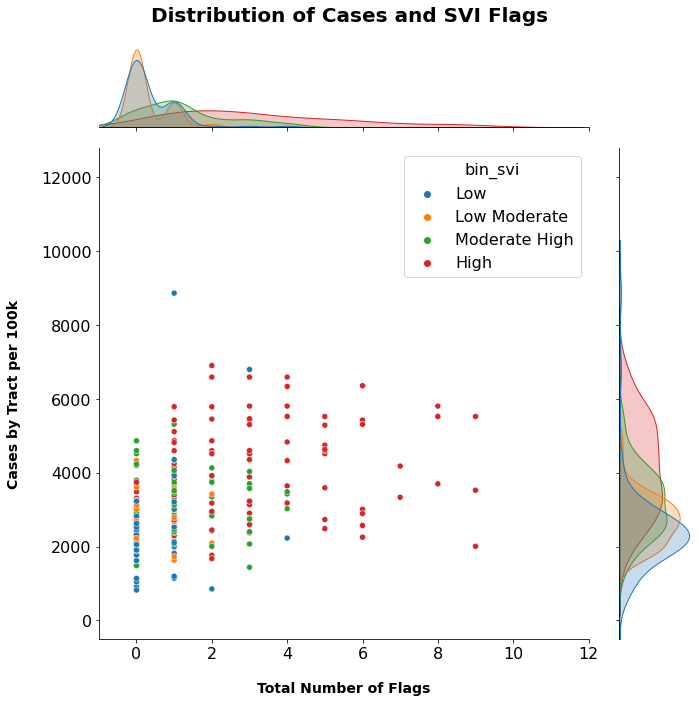

In [68]:
joint_plot_flag("all_flags_total","tract_cases_per_100k",train_exp,'bin_svi')

In [69]:
df, train_exp, X_train_scaled, y_train, X_test_scaled, y_test = wrangle.wrangle_dallas_data()

def joint_plot_flag(x,y,df,hue):
    ax2 = sns.jointplot(x = x, 
                        y = y, 
                        data = df, 
                        hue = hue, 
                        height = 10,
                        space = 0,
                        xlim = (-1,12),
                        ylim = (-500,12800))
    ax2.ax_joint.set_xlabel('Total Number of Flags', fontweight='bold', fontsize = 14,labelpad=20)
    ax2.ax_joint.set_ylabel('Cases by Tract per 100k', fontweight='bold', fontsize = 14,labelpad=20)
    ax2.fig.suptitle("Distribution of Cases and SVI Flags", fontweight='bold', fontsize = 20)
    ax2.fig.tight_layout()
    plt.show()

Acquire: compiling raw data files...
Acquire: Completed!
Prepare: preparing data files...
Prepare: Completed!
(246, 40) (62, 40)


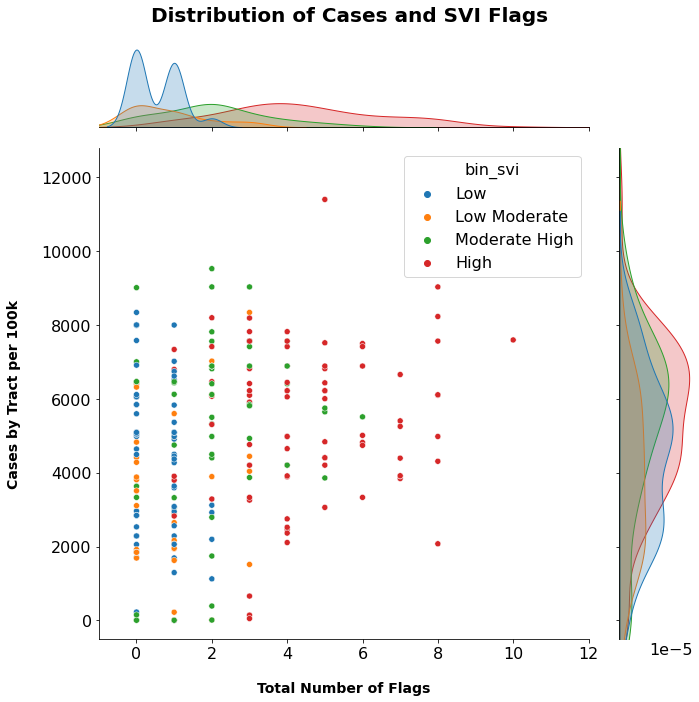

In [70]:
joint_plot_flag("all_flags_total","tract_cases_per_100k",train_exp,'bin_svi')

In [71]:
df, train_exp, X_train_scaled, y_train, X_test_scaled, y_test = wrangle.wrangle_data()

def hist_case_title(series, title):
    '''
    This function will take in a series and produce a hisogram of the series' distribution. 
    You must also provide a title for the chart produced by this function, which should be a separate variable outside of the function.
    '''
    plt.figure(figsize=(12,8))
    plt.rc('font', size=16)
    plt.hist(x = series, bins = 10, color = 'gray', edgecolor='k', alpha=0.45)
    plt.title(title, y=1.02)
    plt.xlabel('Number of Cases per 100,000',labelpad=20)
    plt.ylabel('Tract Count',labelpad=20)
    plt.axvline(series.mean(), color = 'tab:orange', linestyle='dashed', linewidth=5)
    min_ylim_v, max_ylim_v = plt.ylim()
    plt.text(series.mean()*1.05, max_ylim_v*0.9, 'Mean: {:.2f}'.format(series.mean()))
    # plt.axvline(series.median(), color = 'darkgreen', linestyle='dashed', linewidth=5)
    # plt.text(series.median()*.25, max_ylim_v*0.9, 'Median: {:.2f}'.format(series.median()))
    plt.grid(b = True, alpha = .45)
    # plt.figure(figsize = (16, 9))
    plt.ylim([0, 100])
    plt.xlim([0, 12000])
    plt.tight_layout()
    plt.show()

Acquire: compiling raw data files...
Acquire: Completed!
Prepare: preparing data files...
Prepare: Completed!
(289, 40) (73, 40)


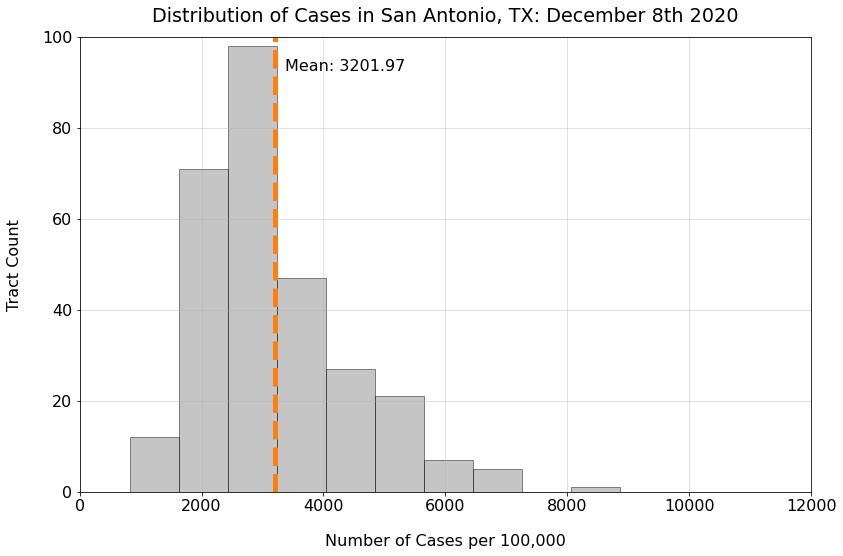

In [72]:
hist_case_title(train_exp.tract_cases_per_100k, "Distribution of Cases in San Antonio, TX: December 8th 2020")

In [73]:
df, train_exp, X_train_scaled, y_train, X_test_scaled, y_test = wrangle.wrangle_dallas_data()

def hist_case_title(series, title):
    '''
    This function will take in a series and produce a hisogram of the series' distribution. 
    You must also provide a title for the chart produced by this function, which should be a separate variable outside of the function.
    '''
    plt.figure(figsize=(12,8))
    plt.rc('font', size=16)
    plt.hist(x = series, bins = 10, color = 'gray', edgecolor='k', alpha=0.45)
    plt.title(title, y=1.02)
    plt.xlabel('Number of Cases per 100,000',labelpad=20)
    plt.ylabel('Tract Count',labelpad=20)
    plt.axvline(series.mean(), color = 'tab:orange', linestyle='dashed', linewidth=5)
    min_ylim_v, max_ylim_v = plt.ylim()
    plt.text(series.mean()*1.05, max_ylim_v*0.9, 'Mean: {:.2f}'.format(series.mean()))
    # plt.axvline(series.median(), color = 'darkgreen', linestyle='dashed', linewidth=5)
    # plt.text(series.median()*.25, max_ylim_v*0.9, 'Median: {:.2f}'.format(series.median()))
    plt.grid(b = True, alpha = .45)
    # plt.figure(figsize = (16, 9))
    plt.ylim([0, 100])
    plt.xlim([0, 12000])
    plt.tight_layout()
    plt.show()

Acquire: compiling raw data files...
Acquire: Completed!
Prepare: preparing data files...
Prepare: Completed!
(246, 40) (62, 40)


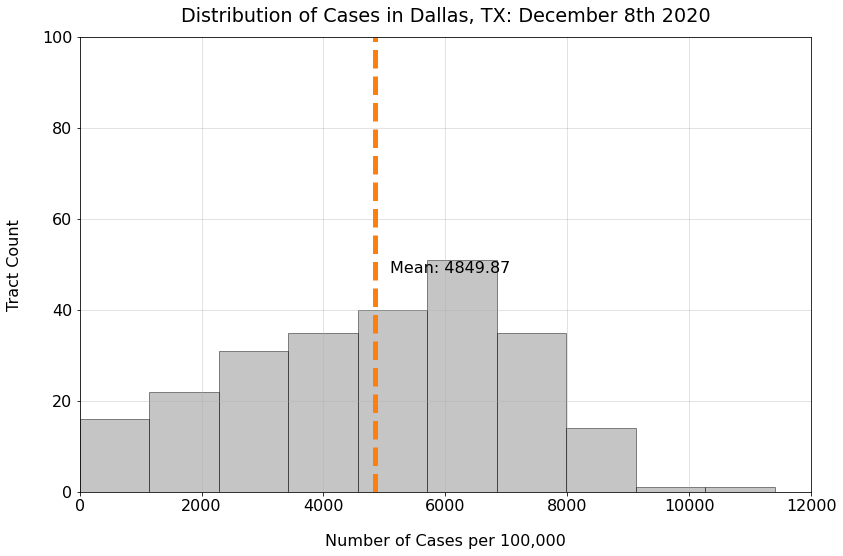

In [74]:
hist_case_title(train_exp.tract_cases_per_100k, "Distribution of Cases in Dallas, TX: December 8th 2020")

# SNS Subplot

Acquire: compiling raw data files...
Acquire: Completed!
Prepare: preparing data files...
Prepare: Completed!
(246, 40) (62, 40)
Acquire: compiling raw data files...
Acquire: Completed!
Prepare: preparing data files...
Prepare: Completed!
(289, 40) (73, 40)


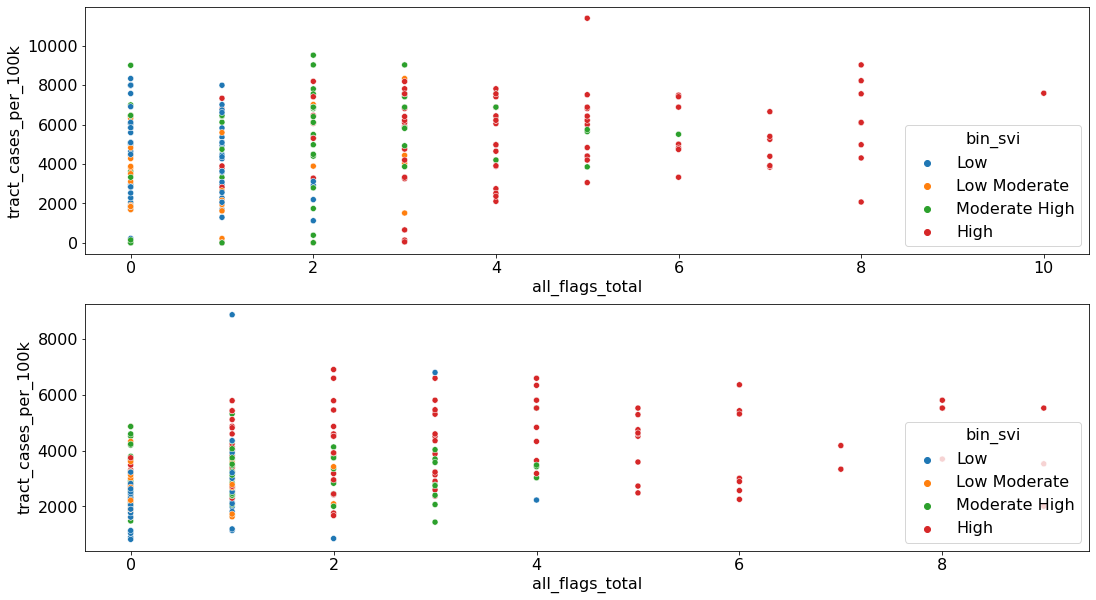

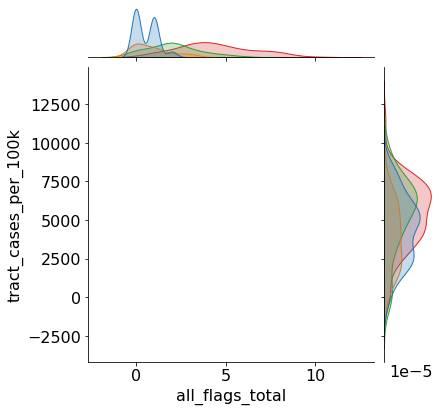

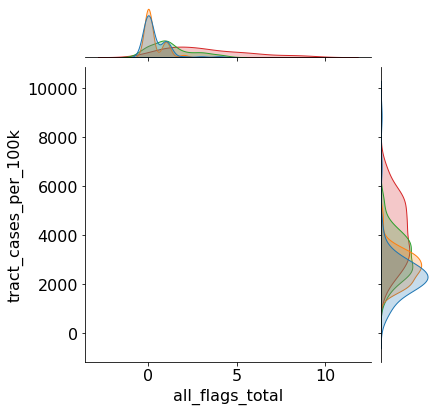

In [94]:

fig, axes = plt.subplots(2,1, figsize=(18, 10))

# Call in df
df, train_exp, X_train_scaled, y_train, X_test_scaled, y_test = wrangle.wrangle_dallas_data()
sns.jointplot(ax=axes[0], x = train_exp.all_flags_total,
                        y = train_exp.tract_cases_per_100k, 
                        hue = train_exp.bin_svi)

df, train_exp, X_train_scaled, y_train, X_test_scaled, y_test = wrangle.wrangle_data()
sns.jointplot(ax=axes[1], x = train_exp.all_flags_total,
                        y = train_exp.tract_cases_per_100k, 
                        hue = train_exp.bin_svi)



plt.show()


In [80]:
train_exp = wrangle.wrangle_data()
plt.figure(figsize=(12,8))
plt.rc('font', size=16)
plt.hist(x = train_exp.tract_cases_per_100k)
# plt.title(title, y=1.02)
# plt.xlabel('Number of Cases per 100,000',labelpad=20)
# plt.ylabel('Tract Count',labelpad=20)
# plt.axvline(series.mean(), color = 'tab:orange', linestyle='dashed', linewidth=5)
# min_ylim_v, max_ylim_v = plt.ylim()
# plt.text(series.mean()*1.05, max_ylim_v*0.9, 'Mean: {:.2f}'.format(series.mean()))
# plt.grid(b = True, alpha = .45)
# plt.ylim([0, 100])
# plt.xlim([0, 12000])
plt.tight_layout()
plt.show()

Acquire: compiling raw data files...
Acquire: Completed!
Prepare: preparing data files...
Prepare: Completed!
(289, 40) (73, 40)


AttributeError: 'tuple' object has no attribute 'tract_cases_per_100k'

<Figure size 864x576 with 0 Axes>